## Generate random variables

a) Generate 1000 independent samples from Normal distribution with mean $\mu = 0$ and variance $\sigma^2 = 1$. Plot and visualize the data.

(Hint: Generate Gaussian samples from uniform random variables.)


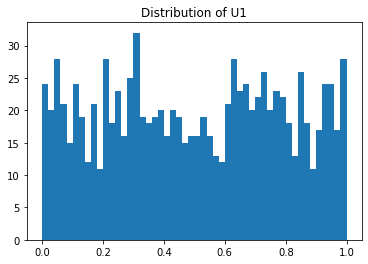

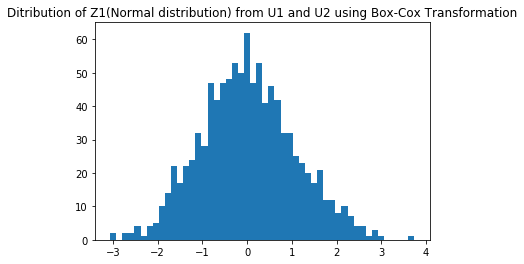

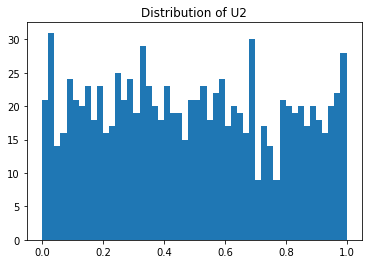

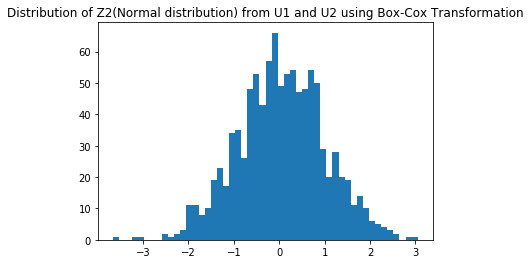

In [9]:
from numpy import random, sqrt, log, cos, sin, pi
import matplotlib.pyplot as plt

# generating independent gaussian samples using BOX-COX Transformation
def gauss_rand(u1,u2):
    t1 = sqrt(-2*log(u1))*cos(2*pi*u2)
    t2 = sqrt(-2*log(u1))*sin(2*pi*u2)
    return t1,t2

# generating two independent uniformly distributed values between 0 and 1
u1 = random.uniform(0,1,1000)
u2 = random.uniform(0,1,1000)

# running the transformation
z1,z2 = gauss_rand(u1,u2)

plt.hist(u1, bins = 50)
plt.title('Distribution of U1')
plt.show()
plt.hist(z1, bins = 50)
plt.title('Ditribution of Z1(Normal distribution) from U1 and U2 using Box-Cox Transformation')
plt.show()
plt.hist(u2, bins = 50)
plt.title('Distribution of U2')
plt.show()
plt.hist(z2, bins = 50)
plt.title('Distribution of Z2(Normal distribution) from U1 and U2 using Box-Cox Transformation')
plt.show()

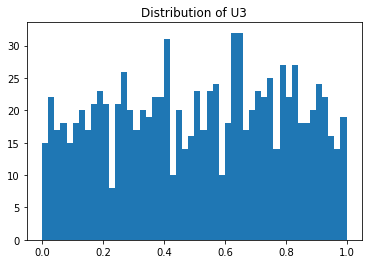

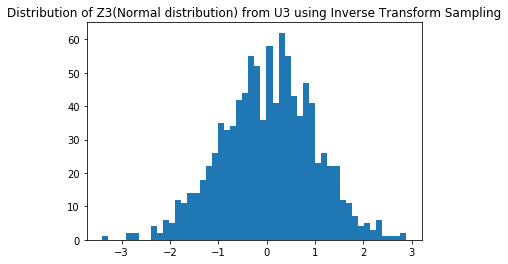

In [8]:
# generating independent gaussian samples from uniform distribution using Inverse transform Sampling method
from scipy.stats import norm
# samples from uniform distribution
u3 = random.uniform(0,1,1000)
# resultant gaussian sample
z3 = norm.ppf(u3)

plt.hist(u3,bins = 50)
plt.title("Distribution of U3")
plt.show()
plt.title('Distribution of Z3(Normal distribution) from U3 using Inverse Transform Sampling')
plt.hist(z3, bins = 50)
plt.show()

### Generate correlated random variables

b) Generate 1000 independent samples from Bivariate Normal distribution with means $\mu_{X} = \mu_{Y} = 0$, variances $\sigma_{X}^2 = \sigma_{Y}^2 = 1$ and correlation coefficient $\rho = - 0.9$. Plot and visualize the data in 2D and 3D.

(Hint: If (X,Y) is Bivariate Normal with $\mu_X = \mu_Y = 0$, $\sigma_X^2 = \sigma^2_Y = 1$ and correlation coefficient $\rho$, then the conditional distribution of $Y$ (conditioned on $X = x$) is Normal with mean $\rho x$ and variance $1 - \rho^2$, i.e., $Y|_{X = x} \sim {\mathcal N}(\rho x, 1 - \rho^2)$.)


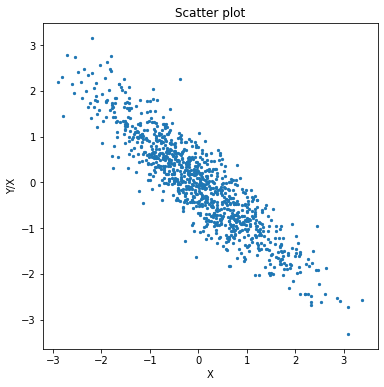

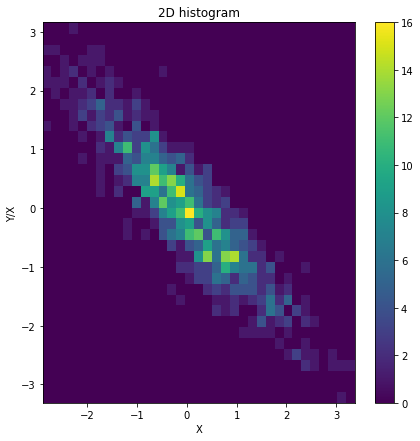

In [7]:
import numpy as np
u3 = np.random.randn(1000)
u4 = np.zeros(1000)
rho = -0.9
for i in range(len(u3)):
    u4[i] = rho*u3[i] + np.sqrt(1-rho**2)*np.random.randn(1)

# 2D plot of the data
plt.figure(figsize=(6,6))
plt.scatter(u3, u4, s=5)
plt.title("Scatter plot")
plt.xlabel('X')
plt.ylabel('Y/X')
plt.show()

# 2d histogram
plt.figure(figsize=(7,7))
plt.hist2d(u3, u4, bins = 35)
plt.title("2D histogram")
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y/X')
plt.show()

## Estimate correlation coefficient

The file 'data_corr.csv' has 1000 independent samples from a Bivariate Normal distribution with means $\mu_X = \mu_Y = 0$, variances $\sigma_X^2 = \sigma_Y^2 = 1$ and unknown correlation coefficient $\rho$.

c) Load the data from the file 'data_corr.npz'. Plot and visualize the marginal and joint distributions of $X$ and $Y$.

d) Comment on the nature of correlation observed in the data.

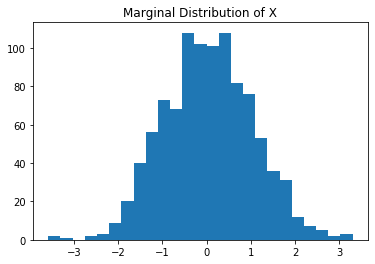

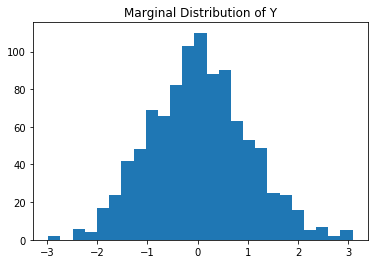

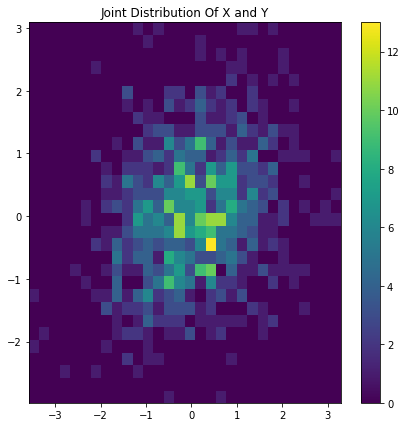

The correlation is: 0.22812516367855662


In [6]:
import pandas as pd
df = pd.read_csv('data_corr.csv')
X = df['X'].values
Y = df['Y '].values
plt.hist(X, bins = 25)
plt.title("Marginal Distribution of X")
plt.show()
plt.hist(Y, bins = 25)
plt.title("Marginal Distribution of Y")
plt.show()
plt.figure(figsize=(7,7))
plt.hist2d(X,Y,bins = 30)
plt.title("Joint Distribution Of X and Y")
plt.colorbar()
plt.show()
correlation = np.corrcoef(X, Y)
print("The correlation is: {}".format(correlation[0,1]))

### Observation 
##### From the joint distribution plot and the correlation value there is a positive correlation between X and Y.

### Maximum Likelihood Estimate using Grid Search

e) Let ${\mathsf P}_{\rho}(\mathbf{X} = \mathbf{x}, \mathbf{Y} = \mathbf{y})$ denote the likelihood function (for the observation $(\mathbf{x}, \mathbf{y})$, as a function of the parameter $\rho$). Compute the likelihood function for the given data and find the maximum likelihood estimate of $\rho$, $\hat{\rho}_{ML}$, using grid search.

(Hint: Plot ${\mathsf P}_{\rho}(\cdot,\cdot)$ as a function of $\rho$.)

In [12]:
# MLE estimation of parameters using Grid Search
from numpy import log, pi, sqrt
n = df.shape[0]
lim = -1e6
rho_est = -1
rho_arr = np.arange(-0.9,1,0.001)
for i in range(len(rho_arr)):
    log_likelihood = -n*log(2*pi*sqrt(1-(rho_arr[i]**2)))-(((sum(X**2)) + (sum(Y**2)) - (2*rho_arr[i]*(sum(X*Y))))/(2*(1-(rho_arr[i]**2))))
    if(log_likelihood > lim):
        lim = log_likelihood
        rho_est = rho_arr[i]
print("The optimum value of rho is: "+ str(rho_est))            


The optimum value of rho is: 0.22900000000000087
1000


### Maximum Likelihood Estimate using Gradient Descent

f) Find the maximum likelihood estimate of $\rho$, $\hat{\rho}_{ML}$, using gradient descent. Plot the estimate of $\rho$ (versus iteration) for different choices of step size (e.g., 0.001, 0.01, 0.1).

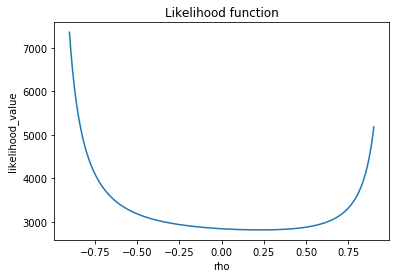

Local minimum of function occurs at rho equals: 0.22996205673662184
Number of steps taken to reach local minima: 45


In [11]:
# MLE estimation of parameters using Gradient Descent
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

# function with rho as variable
lh_func = lambda rho: n*log(2*pi*sqrt(1-(rho**2)))+(((sum(X**2)) + (sum(Y**2)) - (2*rho*(sum(X*Y))))/(2*(1-(rho**2))))
# getting evenly spaced numbers between -1 and 1
s_space = np.arange(-0.9,0.9,0.0001)
#Plot the function
plt.plot(s_space, lh_func(s_space))
plt.title('Likelihood function')
plt.ylabel('likelihood_value')
plt.xlabel('rho')
plt.show()

# # calculating the derivative
def deriv(fun, val):
    return derivative(fun, val, dx=1e-6)   # calculating derivative of function fun at value equals val 

# updating function
def update(val_new, val_old, lamda = 0.0001):
    x = []                                 # to store updated value of rho
    y = []                                 # to store update value of likelihood function
    while abs(val_new - val_old) > 0.0001: # stopping criteria
        val_old = val_new                  # changing the old value to new value
        d_x = -deriv(lh_func, val_old)     # computing the derivative at old value
        val_new = val_old + (lamda * d_x)  # updating the value
        x.append(val_new)                  # storing the new values
        y.append(lh_func(val_new))
    print ("Local minimum of function occurs at rho equals: "+ str(val_new))  
    print ("Number of steps taken to reach local minima: " + str(len(x)))

update(-0.8, -0.9)

### Maximum Likelihood Estimate (Analysis)

g) Find the maximum likelihood estimate of $\rho, \hat{\rho}_{ML}$ analytically (from the likelihood function).

TypeError: brentq() missing 2 required positional arguments: 'a' and 'b'

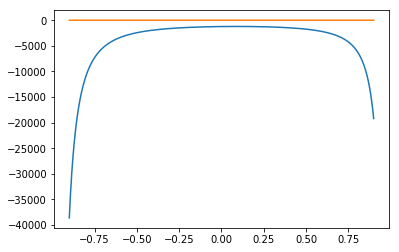

In [7]:
# solving for the roots of the first derivative of likelihood function gives the optimum value of rho
from scipy.optimize import brentq
import matplotlib.pyplot as plt

### Simple Linear Regression

h) Using linear regression, seek a relation between $Y$ and $X$ (i.e., express $Y$ as a linear function of $X$). Comment.

Estimated Regression Coefficients are: (0.22209297029587458, 0.02388922099139093)


Text(0,0.5,'Y')

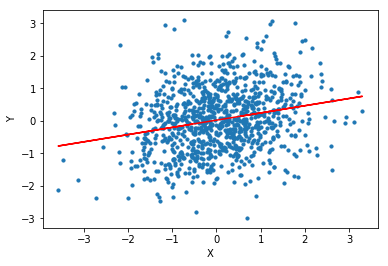

In [8]:
# simple linear regression
import numpy as np
import matplotlib.pyplot as plt
n = np.size(X)
mean_x, mean_y = np.mean(X), np.mean(Y)
Sxy = np.sum(X*Y) - (n*mean_x*mean_y)
Sxx = np.sum(X**2) - (n*(mean_x**2))

# regression coefficients
alpha = Sxy/Sxx
beta = mean_y - (alpha*mean_x)
print("Estimated Regression Coefficients are: {}".format((alpha, beta)))

# prediction with the estimated linear relation 
y_pred = (alpha*X) + beta

# plotting the data and the regression line
plt.scatter(X,Y, s = 10)
plt.plot(X, y_pred,color = "r")
plt.xlabel('X')
plt.ylabel('Y')

## Polynomial Regression

Load the two dimensional data from the file 'data_poly1.npz'.

i) Plot the data and comment on the relation between $X$ and $Y$ (plot $Y$ as a function of $X$).

Text(0,0.5,'Y1')

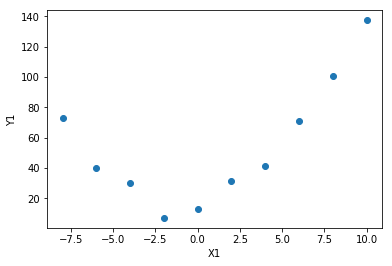

In [9]:
import numpy as np
data = np.load('data_poly1.npz')
X1 = data['x']
Y1 = data['y']
plt.scatter(X1,Y1)
plt.xlabel('X1')
plt.ylabel('Y1')

### Polynomial Regression using Scikit-learn Libraries

Fit a polynomial model (for the suggested degree) to the data. Comment on the fit (as a function of the model) in terms of the mean square error.

(Hint: Use in-built libraries from Scikit-learn for the exercise.)

### Degree 1 (Linear)

j) Using linear regression, seek a relation between $Y$ and $X$. Plot the function and report the mean square error.

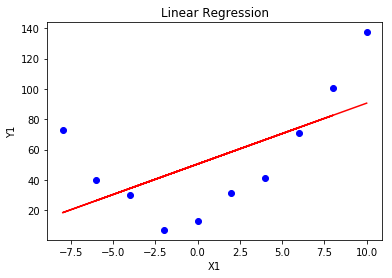

The mean squared error is: 977.1734445909718


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# building a linear model
lr = LinearRegression()
fit1 = lr.fit(X1.reshape(-1,1),Y1.reshape(-1,1))

# visualizing the fit
plt.scatter(X1, Y1, color = 'blue') 
  
plt.plot(X1, lr.predict(X1.reshape(-1,1)), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('X1') 
plt.ylabel('Y1') 
  
plt.show() 
print("The mean squared error is: {}". format(mean_squared_error(Y1, lr.predict(X1.reshape(-1,1)))))

### Degree 2 (Quadratic)

k) Using polynomial regression of degree 2, seek a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

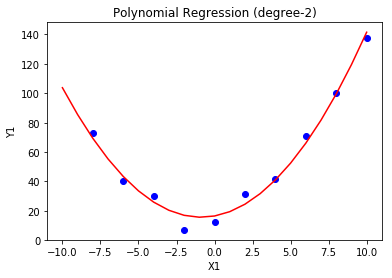

The mean squared error is: 24.846331727808156


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# creating new features and training the model
pol = PolynomialFeatures(degree = 2)
X_new = pol.fit_transform(X1.reshape(-1,1))
lr2 = LinearRegression()
fit2 = lr2.fit(X_new, Y1.reshape(-1,1))

# visualizing the fit
X3 = np.arange(-10,11,1).reshape(-1,1)

plt.scatter(X1, Y1, color = 'blue') 
plt.plot(X3, lr2.predict(pol.fit_transform(X3)), color = 'red') 
plt.title('Polynomial Regression (degree-2)') 
plt.xlabel('X1') 
plt.ylabel('Y1')  
plt.show() 
# Reporting the MSE
print("The mean squared error is: {}". format(mean_squared_error(Y1, lr2.predict(X_new))))

### Degree 9

l) Using polynomial regression of degree 9, seek a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

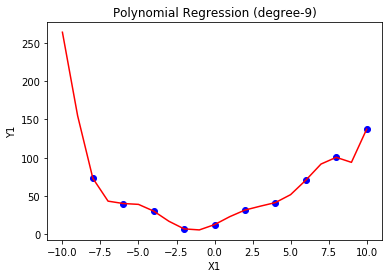

The mean squared error is: 2.9836029474310285e-13


In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# creating new features and training the model
pol_1 = PolynomialFeatures(degree = 9)
X_new_1 = pol_1.fit_transform(X1.reshape(-1,1))
lr3 = LinearRegression()
fit3 = lr3.fit(X_new_1, Y1.reshape(-1,1))

# visualizing the fit
X4 = np.arange(-10,11,1).reshape(-1,1)
plt.scatter(X1, Y1, color = 'blue') 
plt.plot(X4, lr3.predict(pol_1.fit_transform(X4)), color = 'red') 
plt.title('Polynomial Regression (degree-9)') 
plt.xlabel('X1') 
plt.ylabel('Y1')  
plt.show()
# reporting the MSE
print("The mean squared error is: {}". format(mean_squared_error(Y1, lr3.predict(X_new_1))))

### Training Error

m) Plot the mean square error versus the degree of the polynomial fit (for degree = 0,1, ..., 9). Comment on the best model for the data.

The MSE values are: 
 [1.50798216e+03 9.77173445e+02 2.48463317e+01 1.62649223e+01
 1.60313637e+01 1.53562079e+01 1.52222269e+01 9.47795624e+00
 4.89861633e-01 2.98360295e-13]


Text(0,0.5,'Mean-Squared Error')

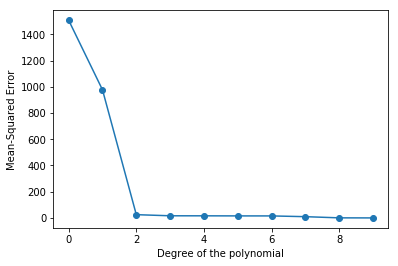

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

deg = np.arange(0,10,1)
mse_train = []
for i in range(len(deg)):
    pol_1 = PolynomialFeatures(degree = deg[i])
    X_new_1 = pol_1.fit_transform(X1.reshape(-1,1))
    lr3 = LinearRegression()
    fit3 = lr3.fit(X_new_1, Y1.reshape(-1,1))
    mse_train.append(mean_squared_error(Y1, lr3.predict(X_new_1)))
    
mse_train = np.array(mse_train)
print("The MSE values are: \n", mse_train)
plt.plot(deg, mse_train, marker = 'o')
plt.xlabel('Degree of the polynomial')
plt.ylabel('Mean-Squared Error')

### Test error

Load 'data_poly2.npz'. The data points in the file are from the same sample as 'data_poly1.npz'.

n) Plot the mean square error (for degrees 0,1,...,9) for the test data set, for the polynomial fit obtained with the training data set 'data_poly1.npz'. Now, comment on the best model for data.

(Hint: Plot Training error and Testing error in the same plot.)

The MSE values are: 
 [9714.48111253467, 10161.131707308188, 63.8139583571868, 903.0295303098908, 527.3952682490578, 2221.6957389852387, 5287.08960639901, 8247548.740853518, 404643462.6695756, 170596818.98554683]


Text(0,0.5,'Mean-Squared Error')

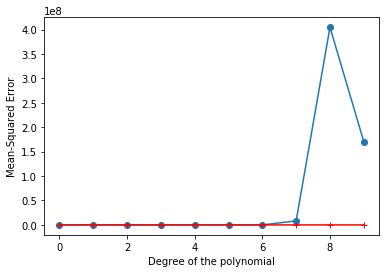

In [15]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_2 = np.load('data_poly2.npz')
X2 = data_2['x']
Y2 = data_2['y']

deg_2 = np.arange(0,10,1)
mse_test = []
for i in range(len(deg)):
    pol = PolynomialFeatures(degree = deg_2[i])
    X_new = pol.fit_transform(X1.reshape(-1,1))
    X_new_2 = pol.fit_transform(X2.reshape(-1,1))
    lr = LinearRegression()
    fit = lr.fit(X_new, Y1.reshape(-1,1))
    mse_test.append(mean_squared_error(Y2, lr.predict(X_new_2)))
    
mse = np.array(mse_test)
print("The MSE values are: \n", mse_test)
plt.plot(deg_2, mse_test, marker = 'o')
plt.plot(deg_2, mse_train, marker = '+', color = 'red')
plt.xlabel('Degree of the polynomial')
plt.ylabel('Mean-Squared Error')